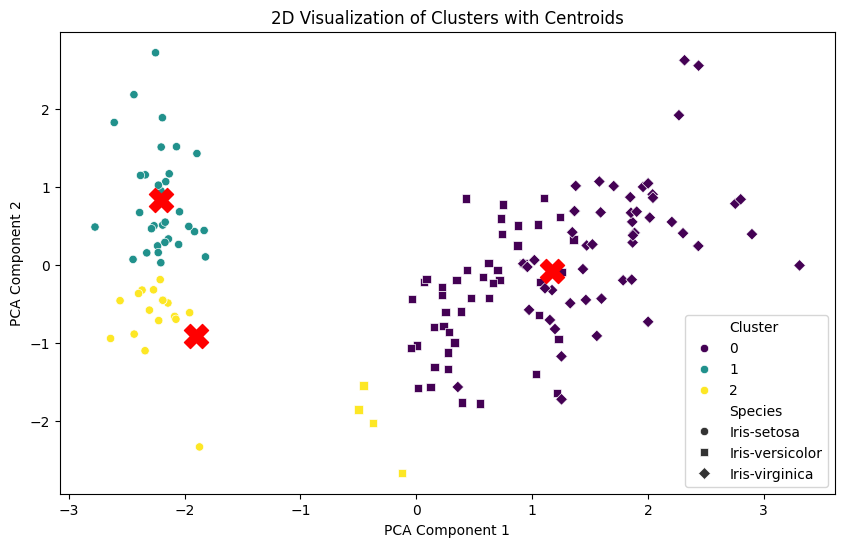

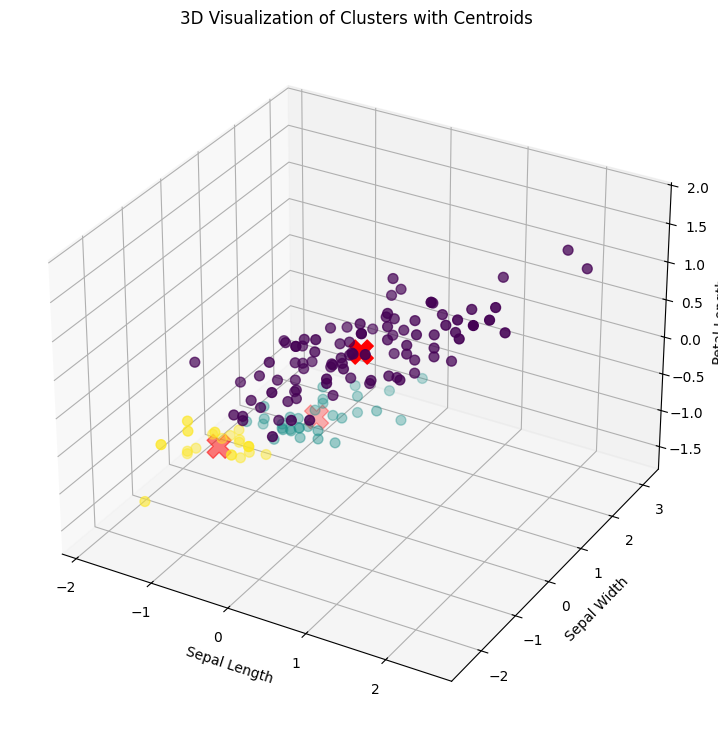

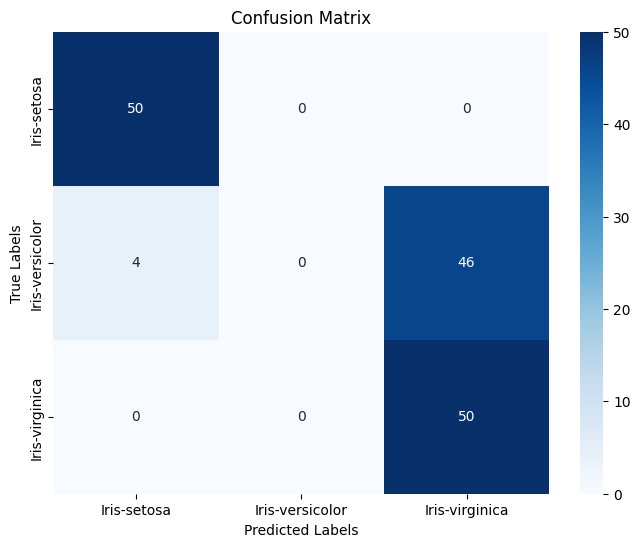


Accuracy Score: 0.6666666666666666

Average Silhouette Score: 0.4787241921049546


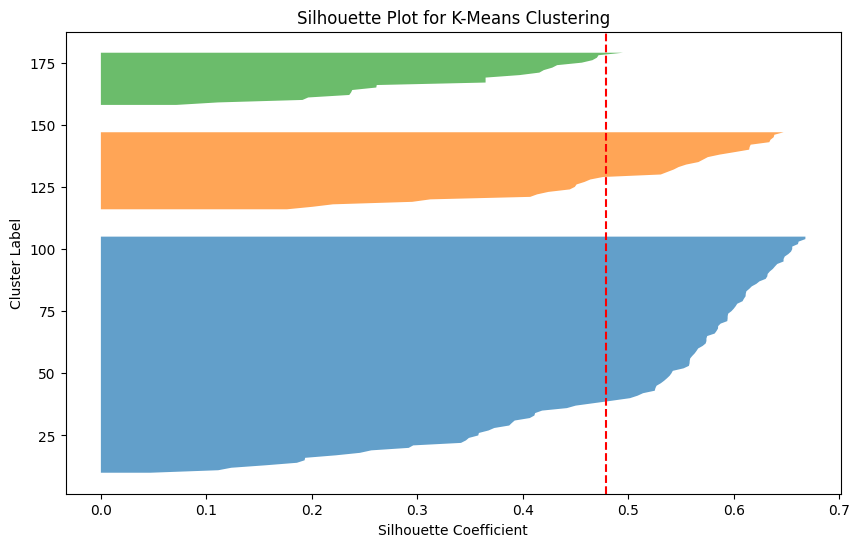

In [8]:
import pandas as pd  # For data manipulation and analysis
from sklearn.preprocessing import StandardScaler  # For feature scaling (normalizing the data)
from sklearn.cluster import KMeans  # For applying K-Means clustering
from sklearn.decomposition import PCA  # For reducing data dimensions (Principal Component Analysis)
from sklearn.metrics import confusion_matrix, accuracy_score, silhouette_score, silhouette_samples  # For evaluating clustering performance
import matplotlib.pyplot as plt  # For creating visualizations and plots
import seaborn as sns  # For enhancing visualizations, especially heatmaps
from mpl_toolkits.mplot3d import Axes3D  # For creating 3D plots
import numpy as np  # For numerical operations and array handling

# Load the Iris dataset from a CSV file
iris_data = pd.read_csv('./Iris.csv')

# Drop the 'Id' and 'Species' columns, retaining only feature columns for clustering
X = iris_data.drop(columns=['Id', 'Species'])

# Normalize the dataset to have mean 0 and variance 1 (INSTRUCTION #1: Normalize the Iris dataset.)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering with k=3 clusters (INSTRUCTION #2: Apply k-means clustering with k=3.)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Get the cluster assignments for each data point and the centroids of each cluster
clusters = kmeans.labels_
centroids = kmeans.cluster_centers_

# Add the cluster assignments back into the original dataset
iris_data['Cluster'] = clusters

# Reduce the dataset's dimensions to 2D using PCA for visualization purposes
pca = PCA(n_components=2)
X_pca_2D = pca.fit_transform(X_scaled)

# Create a 2D scatter plot with the cluster assignments (INSTRUCTION #3: Visualize the cluster assignments and the centroids in 2D and 3D plots.)
plt.figure(figsize=(10, 6))  # Create a new figure with a specific size
sns.scatterplot(x=X_pca_2D[:, 0], y=X_pca_2D[:, 1], hue=iris_data['Cluster'], 
                palette='viridis', style=iris_data['Species'], markers=["o", "s", "D"])
# Scatter plot the centroids with red 'X'
plt.scatter(pca.transform(centroids)[:, 0], pca.transform(centroids)[:, 1], 
            s=300, c='red', marker='X')
plt.title('2D Visualization of Clusters with Centroids')  # Set plot title
plt.xlabel('PCA Component 1')  # Set x-axis label
plt.ylabel('PCA Component 2')  # Set y-axis label
plt.show()  # Display the plot

# Create a 3D scatter plot with the cluster assignments (INSTRUCTION #3: Visualize the cluster assignments and the centroids in 2D and 3D plots.)
fig = plt.figure(figsize=(18, 9))  # Create a new figure with a specific size
ax = fig.add_subplot(111, projection='3d')  # Add a 3D subplot
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], 
           c=clusters, cmap='viridis', s=50)  # Scatter plot for clusters
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], 
           s=300, c='red', marker='X')  # Scatter plot for centroids
ax.set_title('3D Visualization of Clusters with Centroids')  # Set plot title
ax.set_xlabel('Sepal Length')  # Set x-axis label
ax.set_ylabel('Sepal Width')  # Set y-axis label
ax.set_zlabel('Petal Length')  # Set z-axis label
plt.show()  # Display the plot

# Map clusters to actual species based on the majority class in each cluster (INSTRUCTION #4: Compare the cluster assignments with the actual class labels.)
species_to_cluster = iris_data.groupby('Cluster')['Species'].agg(lambda x: x.value_counts().index[0])
iris_data['Predicted_Species'] = iris_data['Cluster'].map(species_to_cluster)

# Calculate the confusion matrix and accuracy score to evaluate clustering performance
conf_matrix = confusion_matrix(iris_data['Species'], iris_data['Predicted_Species'])
accuracy = accuracy_score(iris_data['Species'], iris_data['Predicted_Species'])

# Calculate silhouette scores to evaluate the quality of the clusters
silhouette_avg = silhouette_score(X_scaled, clusters)
silhouette_values = silhouette_samples(X_scaled, clusters)

# Display the confusion matrix, accuracy score, and average silhouette score
# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))  # Create a new figure with a specific size
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris_data['Species'].unique(), yticklabels=iris_data['Species'].unique())
plt.title('Confusion Matrix')  # Set plot title
plt.xlabel('Predicted Labels')  # Set x-axis label
plt.ylabel('True Labels')  # Set y-axis label
plt.show()  # Display the plot
print("\nAccuracy Score:", accuracy)  # Print accuracy score
print("\nAverage Silhouette Score:", silhouette_avg)  # Print average silhouette score

# Enhanced silhouette plot for each cluster (INSTRUCTION #5: Plot the silhouette scores to evaluate the quality of the clusters.)
plt.figure(figsize=(10, 6))  # Create a new figure with a specific size
y_lower = 10  # Initialize the y-coordinate for plotting
for i in range(3):
    ith_cluster_silhouette_values = silhouette_values[clusters == i]  # Get silhouette values for the ith cluster
    ith_cluster_silhouette_values.sort()  # Sort the silhouette values
    size_cluster_i = ith_cluster_silhouette_values.shape[0]  # Get the size of the cluster
    y_upper = y_lower + size_cluster_i  # Compute the upper y-coordinate
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, alpha=0.7)  # Plot the silhouette values
    y_lower = y_upper + 10  # Update the y-coordinate for the next cluster

# Add title and labels to the silhouette plot
plt.title('Silhouette Plot for K-Means Clustering')  # Set plot title
plt.xlabel('Silhouette Coefficient')  # Set x-axis label
plt.ylabel('Cluster Label')  # Set y-axis label
plt.axvline(x=silhouette_avg, color='red', linestyle='--')  # Add a vertical line for average silhouette score
plt.show()  # Display the plot
